In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## A. Nonlinear Transformation
  - Refer to this dataset https://www.kaggle.com/datasets/zeesolver/china-gdp
  - Perform nonlinear transformation on "Value" column
  - Follow the steps taken during reporting

In [114]:
china = pd.read_csv('1_china_gdp.csv')

# Display dataset
china

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [115]:
x, y = china.iloc[:, 0], china.iloc[:, 1]
x, y

(0     1960
 1     1961
 2     1962
 3     1963
 4     1964
 5     1965
 6     1966
 7     1967
 8     1968
 9     1969
 10    1970
 11    1971
 12    1972
 13    1973
 14    1974
 15    1975
 16    1976
 17    1977
 18    1978
 19    1979
 20    1980
 21    1981
 22    1982
 23    1983
 24    1984
 25    1985
 26    1986
 27    1987
 28    1988
 29    1989
 30    1990
 31    1991
 32    1992
 33    1993
 34    1994
 35    1995
 36    1996
 37    1997
 38    1998
 39    1999
 40    2000
 41    2001
 42    2002
 43    2003
 44    2004
 45    2005
 46    2006
 47    2007
 48    2008
 49    2009
 50    2010
 51    2011
 52    2012
 53    2013
 54    2014
 Name: Year, dtype: int64,
 0     5.918412e+10
 1     4.955705e+10
 2     4.668518e+10
 3     5.009730e+10
 4     5.906225e+10
 5     6.970915e+10
 6     7.587943e+10
 7     7.205703e+10
 8     6.999350e+10
 9     7.871882e+10
 10    9.150621e+10
 11    9.856202e+10
 12    1.121598e+11
 13    1.367699e+11
 14    1.422547e+11
 15    1.6116

#### 1: Using Standard Linear Regression

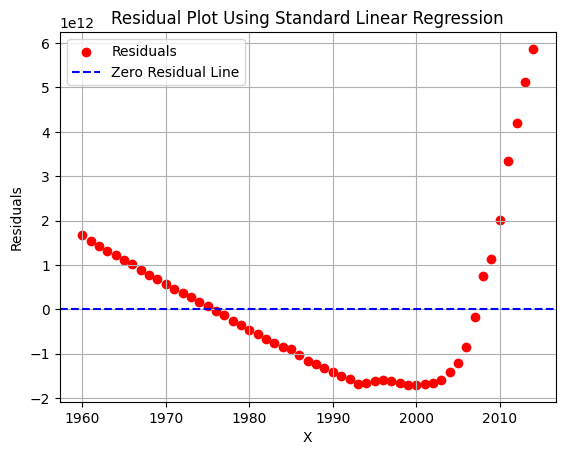

The coefficient of determination or r squared is 0.5239708235574752


In [116]:
# Get slope and intercept
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Predict using the linear regression equation
y_pred = slope * x + intercept

residual = y - y_pred

# Residual plot
plt.scatter(x, residual, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot Using Standard Linear Regression')
plt.grid(True)
plt.show()

r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

#### 2: Using Polynomial Regression

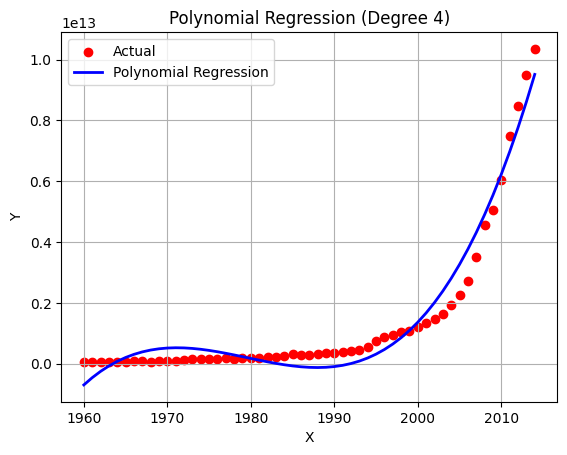

The coefficient of determination or r squared is 0.9651202302209484


In [117]:
# Specify the degree of the polynomial
degree = 4 

# Convert 'x' to a NumPy array and reshape it
x = x.values.reshape(-1, 1)

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

# Fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the polynomial regression equation
y_pred = model.predict(X_poly)

# Plot the data and the polynomial regression curve
plt.scatter(x, y, c='red', label='Actual')
plt.plot(x, y_pred, color='blue', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree})')
plt.grid(True)
plt.show()

# Compute R-squared score
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

#### 3: Using Exponential Transformation

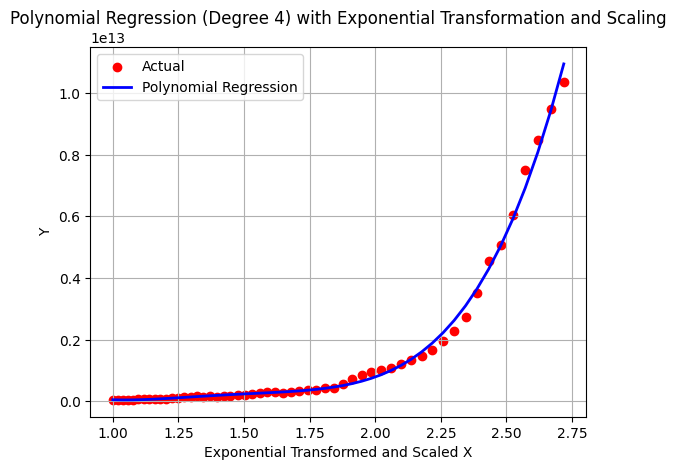

The coefficient of determination or r squared is 0.9954926854176133


In [118]:
# Scale the data to a reasonable range
x_min, x_max = np.min(x), np.max(x)
x_scaled = (x - x_min) / (x_max - x_min)

# Apply exponential transformation to the scaled 'x'
x_exp = np.exp(x_scaled)

# Specify the degree of the polynomial
degree = 4

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x_exp.reshape(-1, 1))

# Fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the polynomial regression equation
y_pred = model.predict(X_poly)

# Plot the data and the polynomial regression curve
plt.scatter(x_exp, y, c='red', label='Actual')
plt.plot(x_exp, y_pred, color='blue', linewidth=2, label='Polynomial Regression')
plt.xlabel('Exponential Transformed and Scaled X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree}) with Exponential Transformation and Scaling')
plt.grid(True)
plt.show()

# Compute R-squared score
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

#### 4: Using Logarithmic Transformation

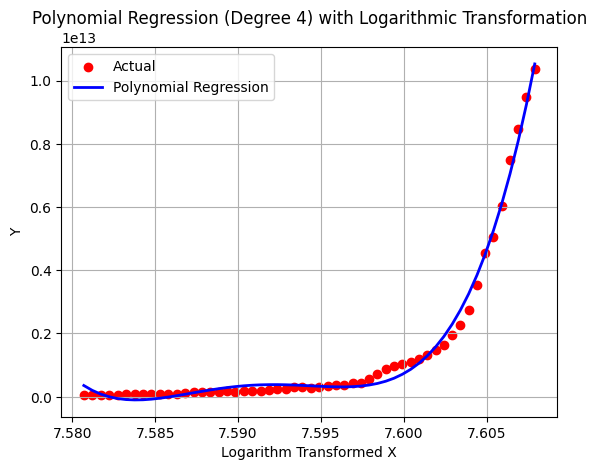

The coefficient of determination or r squared is 0.9929260726807951


In [119]:
# Apply logarithmic transformation to 'x'
x_log = np.log(x)

# Specify the degree of the polynomial
degree = 4

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x_log.reshape(-1, 1))

# Fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the polynomial regression equation
y_pred = model.predict(X_poly)


# Plot the data and the polynomial regression curve
plt.scatter(x_log, y, c='red', label='Actual')
plt.plot(x_log, y_pred, color='blue', linewidth=2, label='Polynomial Regression')
plt.xlabel('Logarithm Transformed X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree}) with Logarithmic Transformation')
plt.grid(True)
plt.show()

# Compute R-squared score
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

## B. Categorical Encoding
  - Refer to this dataset (melb_data.csv) https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
  - Convert the 3 object type columns into numerical values through categorical encoding
  - You may use any categorical encoding approach, feel free to experiment
  - After, review this link to see a guide on this specific dataset: https://www.kaggle.com/code/alexisbcook/categorical-variables#Conclusion

In [120]:
melb = pd.read_csv('2_melb_data.csv')

melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [121]:
categorical_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

In [122]:
# Ordinal Encoder
ordinalEncoder= ce.OrdinalEncoder(cols=categorical_cols, return_df=True)
melb_ordinal = ordinalEncoder.fit_transform(melb)

# OneHot Encoder
melb_onehot = pd.get_dummies(melb, columns=categorical_cols)

# Base N Encoder
encoder = ce.BaseNEncoder(cols=categorical_cols, return_df=True, base=5)
melb_baseN = encoder.fit_transform(melb)


In [123]:
print("\nOrdinal Encoding: \n", melb_ordinal)


Ordinal Encoding: 
        Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  \
0           1        1      2     1  1480000.0       1        1     1   
1           1        2      2     1  1035000.0       1        1     2   
2           1        3      3     1  1465000.0       2        1     3   
3           1        4      3     1   850000.0       3        1     3   
4           1        5      4     1  1600000.0       4        2     4   
...       ...      ...    ...   ...        ...     ...      ...   ...   
13575     249    13374      4     1  1245000.0       1       12    58   
13576     105    13375      3     1  1031000.0       2       36    58   
13577     105    13376      3     1  1170000.0       1       47    58   
13578     105    13377      4     1  2500000.0       3       31    58   
13579     109    13378      4     1  1285000.0       2       32    58   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0           2.5    3067.0  ..

In [124]:
print("\nOne Hot Encoding: \n", melb_onehot)


One Hot Encoding: 
        Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13575      4  1245000.0      16.7    3150.0       4.0       2.0  2.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13577      3  1170000.0       6.8    3016.0       3.0       2.0  4.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  ...  CouncilArea_Yarra  \
0         202.0           NaN        NaN  ... 

In [125]:
print("\nBase N Encoding: \n", melb_baseN)


Base N Encoding: 
        Suburb_0  Suburb_1  Suburb_2  Suburb_3  Address_0  Address_1  \
0             0         0         0         1          0          0   
1             0         0         0         1          0          0   
2             0         0         0         1          0          0   
3             0         0         0         1          0          0   
4             0         0         0         1          0          0   
...         ...       ...       ...       ...        ...        ...   
13575         1         4         4         4          4          1   
13576         0         4         1         0          4          1   
13577         0         4         1         0          4          1   
13578         0         4         1         0          4          1   
13579         0         4         1         4          4          1   

       Address_2  Address_3  Address_4  Address_5  ...  BuildingArea  \
0              0          0          0          1  ... 

## C. Discretization
  - Refer to this dataset (train.csv) https://www.kaggle.com/competitions/spaceship-titanic/data
  - Focus on the columns with continuous variables
  - Use Equal Frequency Discretization
  - Use this guide for more info https://www.kaggle.com/code/mrbisht/discretization-continuous-variables

In [126]:
train = pd.read_csv('3_train.csv')

# Select the continuous columns for discretization
continuous_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Define the number of bins you want
num_bins = 5

# Perform equal frequency discretization for each continuous column
for col in continuous_cols:
    train[f'{col}'] = pd.qcut(train[col], num_bins, labels=False, duplicates='drop')

train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,1.0,0.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.0,True,0.0,1.0,0.0,1.0,0.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,3.0,False,0.0,1.0,1.0,1.0,1.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,1.0,0.0,1.0,1.0,0.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,3.0,True,0.0,1.0,0.0,1.0,0.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,2.0,False,0.0,0.0,1.0,0.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,3.0,False,0.0,1.0,0.0,1.0,1.0,Celeon Hontichre,False


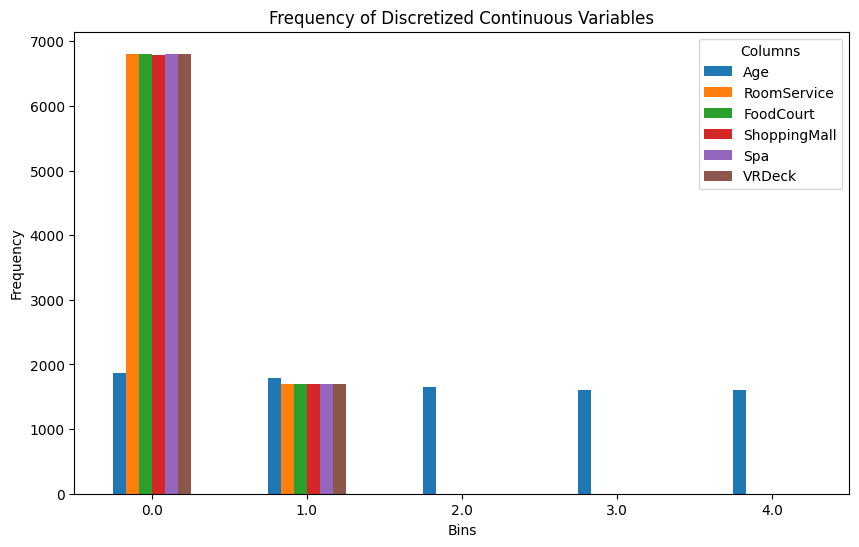

In [127]:
# Initialize an empty array to store data for each column
data = {}

# Count the occurrences of each value in each column
for col in continuous_cols:
    data[col] = train[col].value_counts().sort_index()

# Create a DataFrame from the data
bar_data = pd.DataFrame(data)

# Plot the bar chart
bar_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Frequency of Discretized Continuous Variables")
plt.xticks(rotation=0)
plt.legend(title="Columns")
plt.show()